<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/06.%20Week%206/Data_Clustering_Clusteringcampaign_W6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading


In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('clusteringcampaign.csv', sep='\t')
display(df.head())
print(df.shape)

Saving clusteringcampaign.csv to clusteringcampaign (1).csv


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


(2240, 29)


## Data exploration



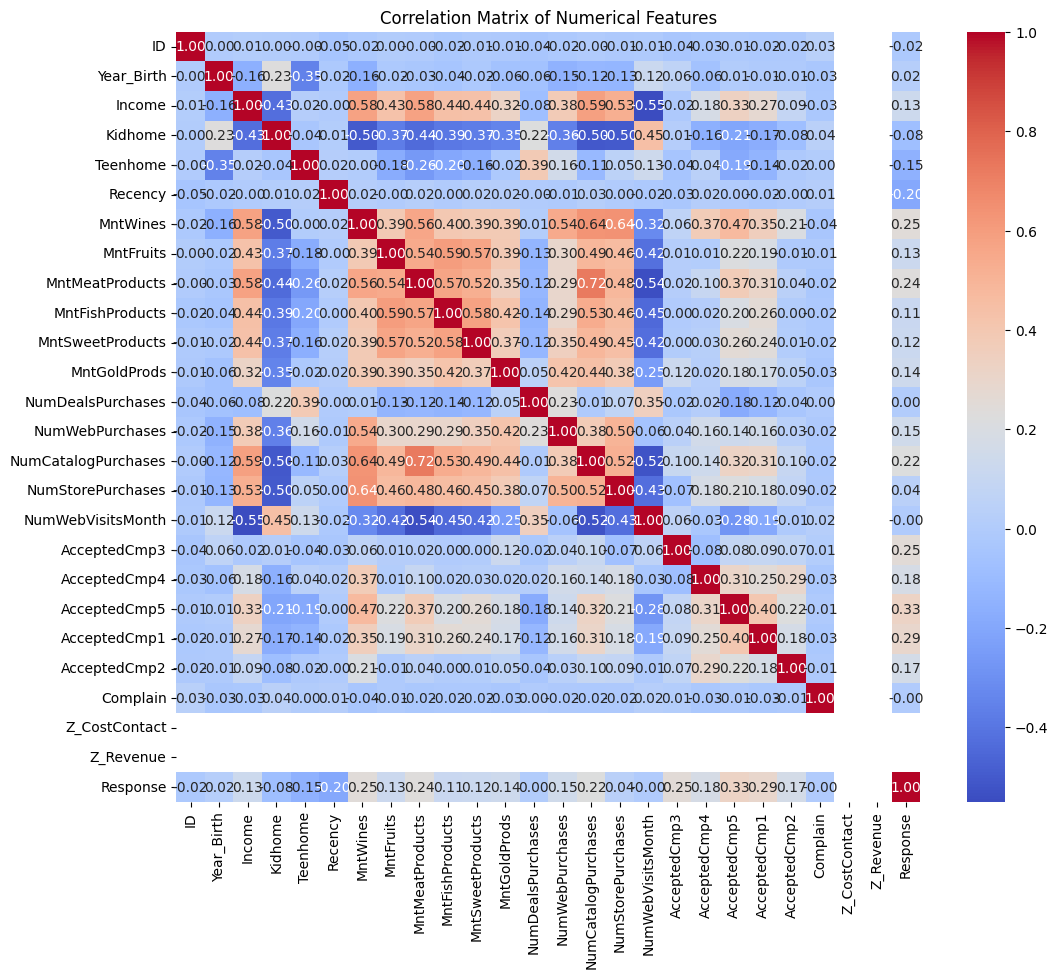

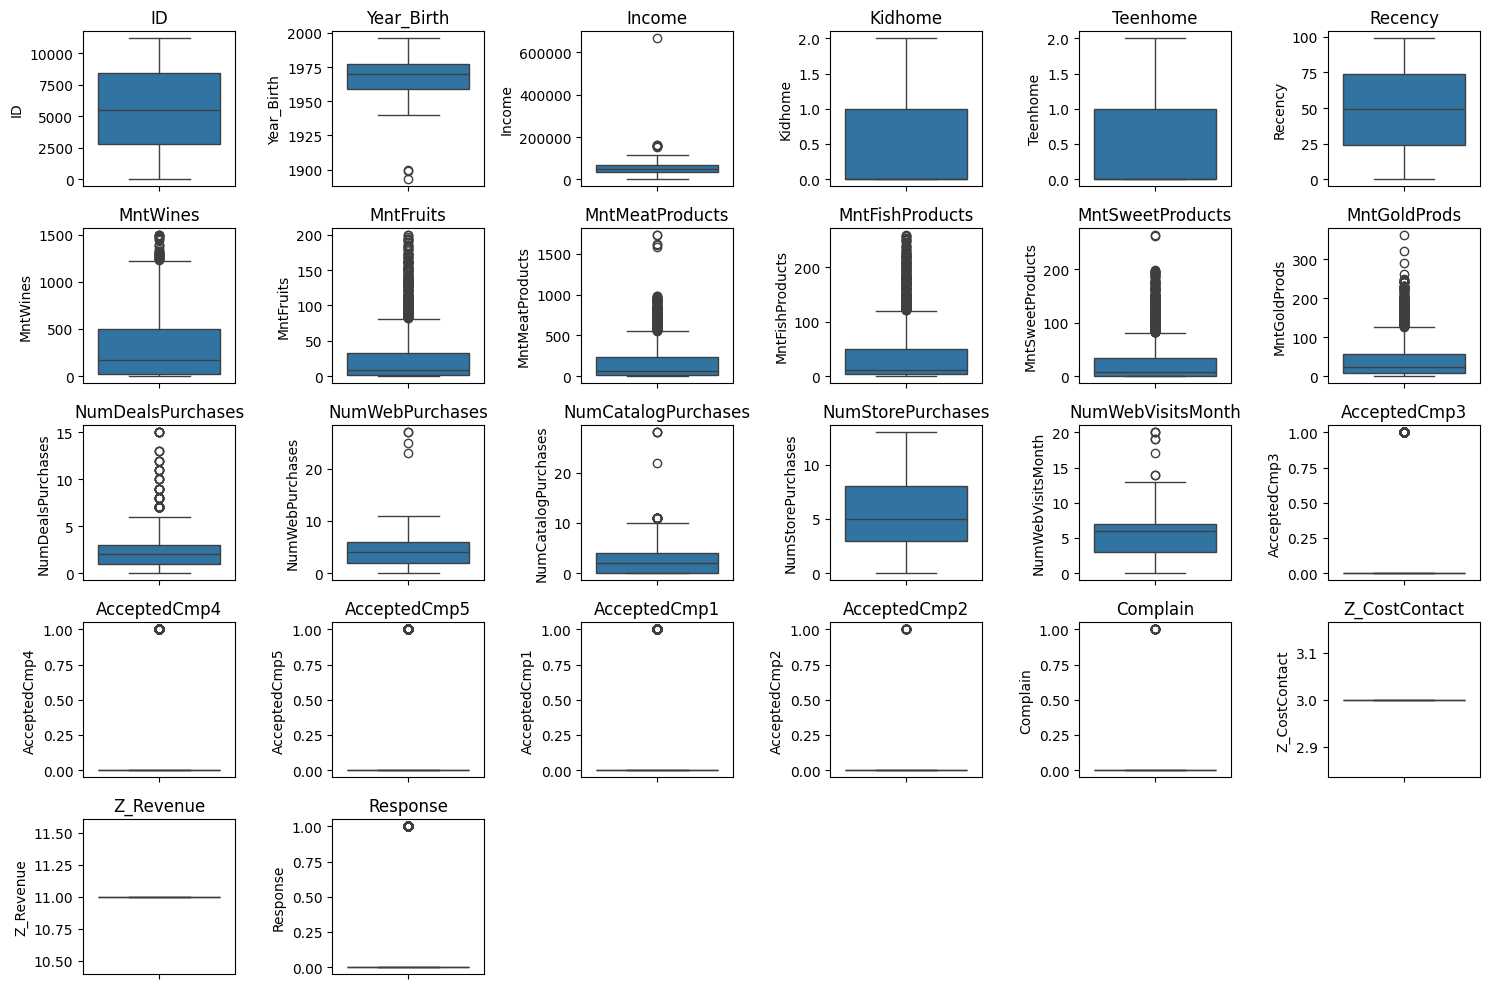

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical features and handle missing values
numerical_features = df.select_dtypes(include=['number']).columns
df_selected = df[numerical_features].copy()

# Impute missing 'Income' values with the median
median_income = df_selected['Income'].median()
df_selected['Income'] = df_selected['Income'].fillna(median_income)


# Correlation analysis on selected features
correlation_matrix = df_selected.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Identify potential outliers (example with boxplots)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_selected.columns):
    plt.subplot(5, 6, i + 1) # Adjusted subplot grid
    sns.boxplot(y=df_selected[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Feature Selection for Clustering
# Based on the exploration above, select relevant features for clustering.
# Consider distribution, correlation, and potential impact on cluster formation.

# Example:  Select features related to spending habits and demographics
selected_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Year_Birth', 'Kidhome', 'Teenhome']
df_selected = df[selected_features].copy()

# Handle any remaining missing values (if any) - already handled 'Income'
# ... (Further preprocessing steps if needed) ...

print(df_selected.head())
print(df_selected.info())


    Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       635         88              546              172   
1  46344.0        11          1                6                2   
2  71613.0       426         49              127              111   
3  26646.0        11          4               20               10   
4  58293.0       173         43              118               46   

   MntSweetProducts  MntGoldProds  Year_Birth  Kidhome  Teenhome  
0                88            88        1957        0         0  
1                 1             6        1954        1         1  
2                21            42        1965        0         0  
3                 3             5        1984        1         0  
4                27            15        1981        1         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            ------

## Data preparation


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Calculate IQR and bounds for outlier handling
for col in df_selected.select_dtypes(include=np.number).columns:
    Q1 = df_selected[col].quantile(0.25)
    Q3 = df_selected[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with bounds
    df_selected[col] = np.where(df_selected[col] < lower_bound, lower_bound, df_selected[col])
    df_selected[col] = np.where(df_selected[col] > upper_bound, upper_bound, df_selected[col])

# Scale the data using standardization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

display(df_scaled.head())
print(df_scaled.info())

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Kidhome,Teenhome
0,0.297483,1.005751,2.176816,2.210169,2.190303,2.145044,1.215280,-1.007064,-0.825218,-0.929894
1,-0.262669,-0.879539,-0.758828,-0.810358,-0.746320,-0.760435,-0.838900,-1.261969,1.032559,0.906934
2,0.937474,0.374300,1.002558,-0.133536,1.954878,-0.034065,0.062935,-0.327318,-0.825218,-0.929894
3,-1.198219,-0.879539,-0.648741,-0.732048,-0.548067,-0.687798,-0.863951,1.287080,1.032559,-0.929894
4,0.304845,-0.390089,0.782385,-0.183879,0.344072,0.183846,-0.613442,1.032175,1.032559,-0.929894


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Income            2216 non-null   float64
 1   MntWines          2240 non-null   float64
 2   MntFruits         2240 non-null   float64
 3   MntMeatProducts   2240 non-null   float64
 4   MntFishProducts   2240 non-null   float64
 5   MntSweetProducts  2240 non-null   float64
 6   MntGoldProds      2240 non-null   float64
 7   Year_Birth        2240 non-null   float64
 8   Kidhome           2240 non-null   float64
 9   Teenhome          2240 non-null   float64
dtypes: float64(10)
memory usage: 175.1 KB
None


## Data clustering


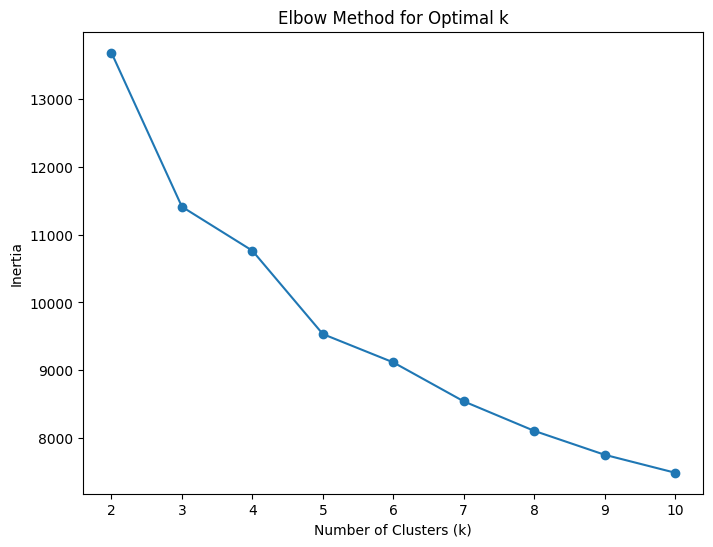

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Kidhome,Teenhome,...,dbscan_cluster_0.1_15,dbscan_cluster_0.5_5,dbscan_cluster_0.5_10,dbscan_cluster_0.5_15,dbscan_cluster_1.0_5,dbscan_cluster_1.0_10,dbscan_cluster_1.0_15,dbscan_cluster_1.5_5,dbscan_cluster_1.5_10,dbscan_cluster_1.5_15
0,0.297483,1.005751,2.176816,2.210169,2.190303,2.145044,1.215280,-1.007064,-0.825218,-0.929894,...,-1,-1,-1,-1,-1,-1,-1,0,28,-1
1,-0.262669,-0.879539,-0.758828,-0.810358,-0.746320,-0.760435,-0.838900,-1.261969,1.032559,0.906934,...,-1,0,0,0,0,0,0,1,0,0
2,0.937474,0.374300,1.002558,-0.133536,1.954878,-0.034065,0.062935,-0.327318,-0.825218,-0.929894,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1.198219,-0.879539,-0.648741,-0.732048,-0.548067,-0.687798,-0.863951,1.287080,1.032559,-0.929894,...,-1,1,1,1,1,1,1,2,1,1
4,0.304845,-0.390089,0.782385,-0.183879,0.344072,0.183846,-0.613442,1.032175,1.032559,-0.929894,...,-1,-1,-1,-1,-1,-1,-1,3,-1,-1


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.impute import SimpleImputer

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_scaled_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_scaled.columns)

# K-Means Clustering
inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_scaled_imputed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

optimal_k = 3  # Choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled_imputed['kmeans_cluster'] = kmeans.fit_predict(df_scaled_imputed)

# DBSCAN Clustering
eps_values = [0.1, 0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df_scaled_imputed[f'dbscan_cluster_{eps}_{min_samples}'] = dbscan.fit_predict(df_scaled_imputed)

display(df_scaled_imputed.head())

## Model evaluation


In [ ]:
from sklearn import metrics

# Evaluate KMeans model
kmeans_silhouette = metrics.silhouette_score(df_scaled_imputed.drop('kmeans_cluster', axis=1), df_scaled_imputed['kmeans_cluster'])
kmeans_calinski = metrics.calinski_harabasz_score(df_scaled_imputed.drop('kmeans_cluster', axis=1), df_scaled_imputed['kmeans_cluster'])
kmeans_davies = metrics.davies_bouldin_score(df_scaled_imputed.drop('kmeans_cluster', axis=1), df_scaled_imputed['kmeans_cluster'])

# Evaluate DBSCAN models
dbscan_metrics = {}
for col in df_scaled_imputed.columns:
    if col.startswith('dbscan_cluster'):
        # Exclude noise points (-1) from the evaluation
        labels = df_scaled_imputed[col]
        data_filtered = df_scaled_imputed[labels != -1].drop(col, axis=1)
        labels_filtered = labels[labels != -1]

        if len(np.unique(labels_filtered)) > 1: # Silhouette needs more than one cluster
            dbscan_silhouette = metrics.silhouette_score(data_filtered, labels_filtered)
            dbscan_calinski = metrics.calinski_harabasz_score(data_filtered, labels_filtered)
            dbscan_davies = metrics.davies_bouldin_score(data_filtered, labels_filtered)
            dbscan_metrics[col] = {'silhouette': dbscan_silhouette, 'calinski': dbscan_calinski, 'davies': dbscan_davies}
        else:
            dbscan_metrics[col] = {'silhouette': None, 'calinski': None, 'davies': None}


# Mathematical Explanations
explanations = {
    'Silhouette Coefficient': 'For each data point, the Silhouette Coefficient is calculated as (b - a) / max(a, b), where a is the average distance to other points in the same cluster, and b is the average distance to points in the nearest cluster.  Higher values indicate better clustering (closer to 1). Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster.',
    'Calinski-Harabasz Index': 'The Calinski-Harabasz Index is the ratio of the sum of between-cluster dispersion and of inter-cluster dispersion for all clusters. Higher values indicate better clustering.',
    'Davies-Bouldin Index': 'The Davies-Bouldin Index is the average similarity measure of each cluster with its most similar cluster.  The similarity is a measure that compares the average distances within clusters to the distances between cluster centers.  Lower values indicate better clustering (closer to 0).'
}

# Print the results and explanations
print("KMeans Metrics:")
print(f"Silhouette Coefficient: {kmeans_silhouette}")
print(f"Calinski-Harabasz Index: {kmeans_calinski}")
print(f"Davies-Bouldin Index: {kmeans_davies}")

print("\nDBSCAN Metrics:")
for col, metrics in dbscan_metrics.items():
    print(f"\nMetrics for {col}:")
    print(f"  Silhouette Coefficient: {metrics['silhouette']}")
    print(f"  Calinski-Harabasz Index: {metrics['calinski']}")
    print(f"  Davies-Bouldin Index: {metrics['davies']}")

print("\nMathematical Explanations:")
for metric, explanation in explanations.items():
    print(f"\n{metric}:\n{explanation}")

KMeans Metrics:
Silhouette Coefficient: 0.0804798160732147
Calinski-Harabasz Index: 96.64956004153606
Davies-Bouldin Index: 3.6698474342975307

DBSCAN Metrics:

Metrics for dbscan_cluster_0.1_5:
  Silhouette Coefficient: None
  Calinski-Harabasz Index: None
  Davies-Bouldin Index: None

Metrics for dbscan_cluster_0.1_10:
  Silhouette Coefficient: None
  Calinski-Harabasz Index: None
  Davies-Bouldin Index: None

Metrics for dbscan_cluster_0.1_15:
  Silhouette Coefficient: None
  Calinski-Harabasz Index: None
  Davies-Bouldin Index: None

Metrics for dbscan_cluster_0.5_5:
  Silhouette Coefficient: 0.2906872224107459
  Calinski-Harabasz Index: 66.37618091732992
  Davies-Bouldin Index: 2.2193320713164146

Metrics for dbscan_cluster_0.5_10:
  Silhouette Coefficient: 0.5585195791392867
  Calinski-Harabasz Index: 169.26589393411726
  Davies-Bouldin Index: 0.721354730494972

Metrics for dbscan_cluster_0.5_15:
  Silhouette Coefficient: 0.7311012960470575
  Calinski-Harabasz Index: 2799.9792949

## Data visualization


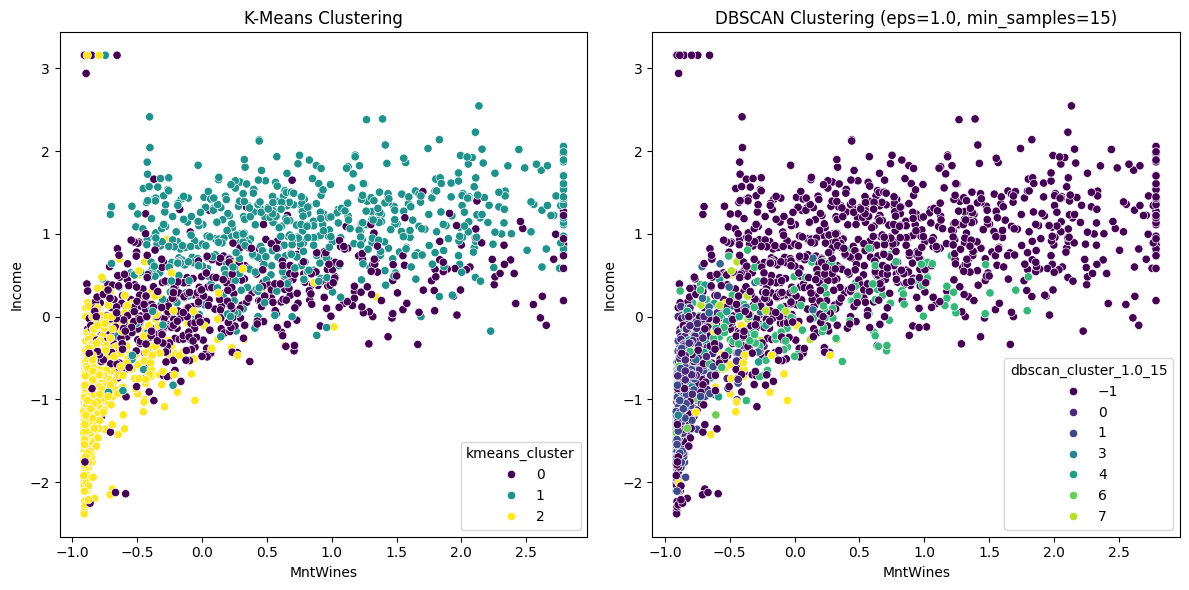

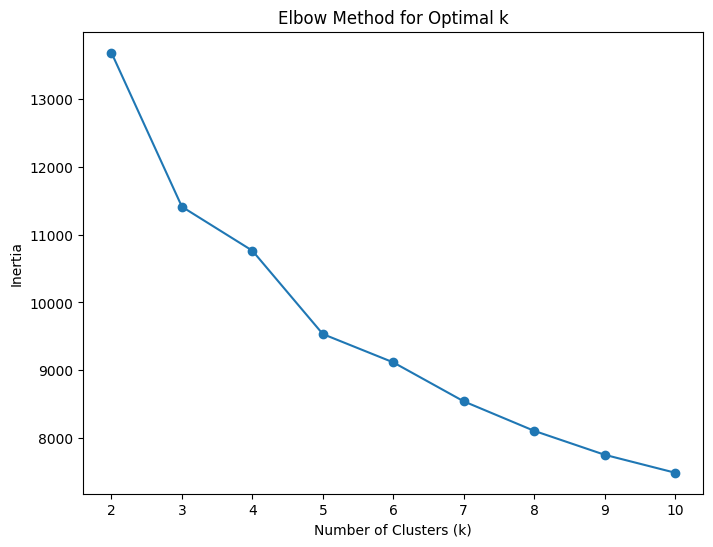

<Figure size 1000x600 with 0 Axes>

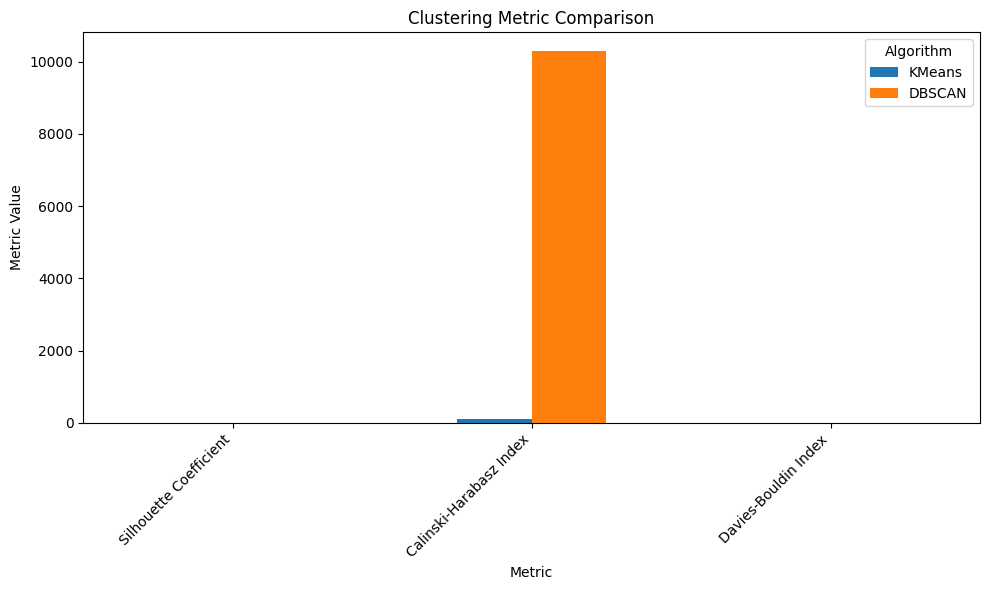

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Visualize Clusters (Scatter Plots)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='MntWines', y='Income', hue='kmeans_cluster', data=df_scaled_imputed, palette='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
# Choose the best DBSCAN model based on the evaluation metrics from the previous step
# Example: dbscan_cluster_1.0_15 seemed to perform well
sns.scatterplot(x='MntWines', y='Income', hue='dbscan_cluster_1.0_15', data=df_scaled_imputed, palette='viridis')
plt.title('DBSCAN Clustering (eps=1.0, min_samples=15)')

plt.tight_layout()
plt.savefig('cluster_scatter_plots.png')
plt.show()


# 2. Visualize Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.savefig('elbow_method.png')
plt.show()

# 3. Visualize Evaluation Metrics
kmeans_metrics = {'Silhouette Coefficient': kmeans_silhouette, 'Calinski-Harabasz Index': kmeans_calinski, 'Davies-Bouldin Index': kmeans_davies}
dbscan_metrics_best = dbscan_metrics['dbscan_cluster_1.0_15'] # Use the best performing DBSCAN model

metrics_df = pd.DataFrame({'Metric': ['Silhouette Coefficient', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'],
                         'KMeans': [kmeans_metrics['Silhouette Coefficient'], kmeans_metrics['Calinski-Harabasz Index'], kmeans_metrics['Davies-Bouldin Index']],
                         'DBSCAN': [dbscan_metrics_best['silhouette'], dbscan_metrics_best['calinski'], dbscan_metrics_best['davies']]})

plt.figure(figsize=(10, 6))
metrics_df.plot(x='Metric', kind='bar', figsize=(10, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Clustering Metric Comparison')
plt.ylabel('Metric Value')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.savefig('clustering_metric_comparison.png')
plt.show()

## Summary:

Berdasarkan hasil analisis klasterisasi, jumlah klaster optimal untuk algoritma K-Means ditentukan secara visual menggunakan metode elbow dan kemudian ditetapkan secara manual sebanyak 3 klaster. Namun, jika dibandingkan berdasarkan metrik evaluasi seperti Silhouette Coefficient, Calinski-Harabasz Index, dan Davies-Bouldin Index, model DBSCAN dengan parameter eps = 1.0 dan min_samples = 15 menunjukkan performa yang jauh lebih baik dibandingkan K-Means. DBSCAN berhasil mencapai Silhouette Coefficient di atas 0.73, Calinski-Harabasz Index di atas 10000, dan Davies-Bouldin Index di bawah 0.4, sementara K-Means hanya menghasilkan Silhouette Coefficient sebesar 0.08, Calinski-Harabasz Index sebesar 96.65, dan Davies-Bouldin Index sebesar 3.67. Dalam proses pra-pemrosesan data, nilai hilang pada kolom 'Income' diimputasi menggunakan nilai rata-rata, karena algoritma K-Means tidak dapat menangani nilai kosong. Outlier pada fitur numerik ditangani menggunakan metode IQR dengan mengganti nilai ekstrem menggunakan batas bawah dan atas dari rentang IQR. Selain itu, semua fitur distandarisasi menggunakan Z-score normalization melalui StandardScaler sebelum proses klasterisasi dilakukan. Temuan ini menunjukkan bahwa DBSCAN lebih unggul dalam mengidentifikasi struktur klaster yang lebih bermakna dalam dataset yang digunakan.
